# Crunchbase Company Profiles: An Analysis
### 1. Introduction

[Crunchbase](https://www.crunchbase.com/home) is the leading destination for company insights from early-stage startups to the Fortune 1000.

The goal of this project is to analyze the organization profiles available on its platform via its daily CSV export, mainly the geographic data.

The `organizations.csv` dataset explored in this project is from `Wed, Mar 15, 2023`. The latest dataset file can be downloaded Crunchbase's [Daily CSV Export](https://data.crunchbase.com/docs/daily-csv-export) page documentation.

### 2. Download the organizations dataset

After generating and obtaining an API key, downloading the dataset is as easy as just visiting the below URL in a browser:

`https://api.crunchbase.com/odm/v4/odm.tar.gz?user_key=user_key`

In [1]:
import os
import requests

cb_file = 'data/crunchbase.tar.gz'

if not os.path.exists(cb_file):
    url = 'https://api.crunchbase.com/odm/v4/odm.tar.gz?user_key=' + os.environ.get('cb_api_key')
    response = requests.get(url)
    open(cb_file, 'wb').write(response.content)

In [2]:
!ls -1 data

crunchbase.tar.gz


In [3]:
# check the file size
!ls -lh data/crunchbase.tar.gz

-rwxr-xr-x 1 jovyan users 437M Mar 16 13:15 data/crunchbase.tar.gz


In [4]:
# untar the file to the 'data' directory
!tar -xvf data/crunchbase.tar.gz --directory data

people.csv
organizations.csv
checksum.csv


In [5]:
# check the file sizes
!ls -lh data/*.csv

-rwxr-xr-x 1 jovyan users  210 Mar 15 20:19 data/checksum.csv
-rwxr-xr-x 1 jovyan users 1.3G Mar 15 20:19 data/organizations.csv
-rwxr-xr-x 1 jovyan users 394M Mar 15 20:15 data/people.csv


In [6]:
# view the checksum
!cat data/checksum.csv

filename,previous_check_sum,current_check_sum
organizations.csv,28a9f3b94e26176acdbc224d815b3d34,b0b84b53c5882a70ced6a70366a07f03
people.csv,1647b38fe8dc3febe53fd861bab1c26e,99aeb4099447e30fd813c0c69a587422


In [7]:
# verify the checksum matches
!md5sum data/organizations.csv

b0b84b53c5882a70ced6a70366a07f03  data/organizations.csv


In [8]:
# delete un-needed files
!rm data/checksum.csv data/people.csv
!ls -R1 data

data:
crunchbase.tar.gz
organizations.csv


In [9]:
# check to see approximately how many rows
!wc -l data/organizations.csv

2502933 data/organizations.csv


### 3. Preload the dataset

Let's see a preview of the first 3 rows:

In [10]:
import pandas as pd

first_3_rows = pd.read_csv('data/organizations.csv', nrows=3)

first_3_rows

,uuid,name,type,primary_role,cb_url,domain,homepage_url,logo_url,facebook_url,twitter_url,linkedin_url,combined_stock_symbols,city,region,country_code,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,company,https://www.crunchbase.com/organization/wetpai...,wetpaint.com,http://www.wetpaint.com/,https://res.cloudinary.com/crunchbase-producti...,https://www.facebook.com/Wetpaint,https://twitter.com/wetpainttv,NaN,NaN,New York,New York,USA,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,company,https://www.crunchbase.com/organization/zoho?u...,zoho.com,https://www.zoho.com,https://res.cloudinary.com/crunchbase-producti...,http://www.facebook.com/zoho,http://twitter.com/zoho,https://www.linkedin.com/company/zoho,NaN,Pleasanton,California,USA,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,company,https://www.crunchbase.com/organization/digg?u...,digg.com,http://www.digg.com,https://res.cloudinary.com/crunchbase-producti...,http://www.facebook.com/digg,http://twitter.com/digg,http://www.linkedin.com/company/digg,NaN,New York,New York,USA,Digg Inc. operates a website that enables its ...


### 4. Select which columns to drop.

For our analysis purposes, we can drop these 9 columns:

```
uuid
cb_url
domain
homepage_url
logo_url
facebook_url
twitter_url
linkedin_url
short_description
```

In [11]:
to_drop = ['uuid', 'cb_url', 'domain',
           'homepage_url', 'logo_url', 'facebook_url', 
           'twitter_url', 'linkedin_url', 'short_description']

to_keep = first_3_rows.columns.drop(to_drop).tolist()

to_keep

['name',
 'type',
 'primary_role',
 'combined_stock_symbols',
 'city',
 'region',
 'country_code']

### 5. Load the dataset

The next step is to load the dataset into a dataframe with the columns above.

In [12]:
df = pd.read_csv('data/organizations.csv', usecols=to_keep)

def get_mem_usage(dataframe):
    print(f'Memory usage of entire dataset in MB is: {round(dataframe.memory_usage(deep=True).sum() / 2 ** 20, 2)}')
    
get_mem_usage(df)

Memory usage of entire dataset in MB is: 1011.74


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502929 entries, 0 to 2502928
Data columns (total 7 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   name                    object
 1   type                    object
 2   primary_role            object
 3   combined_stock_symbols  object
 4   city                    object
 5   region                  object
 6   country_code            object
dtypes: object(7)
memory usage: 133.7+ MB


In [14]:
df.shape

(2502929, 7)

In [15]:
df.columns

Index(['name', 'type', 'primary_role', 'combined_stock_symbols', 'city',
       'region', 'country_code'],
      dtype='object')

In [16]:
df.sample(5)

,name,type,primary_role,combined_stock_symbols,city,region,country_code
1974942,CRYPTO,organization,company,NaN,Nancy,Lorraine,FRA
1334352,CASES,organization,company,NaN,New York,New York,USA
795271,Eugenia L Foster CPA,organization,company,NaN,Cumming,Georgia,USA
1357012,Express Dental Care,organization,company,NaN,Tampa,Florida,USA
1278318,Hartford Technologies,organization,company,NaN,Rocky Hill,Connecticut,USA


### 6. Data Wrangling
Let's start by checking for any NaN values:

In [17]:
for col in df.columns:
    print(df[col].isna().value_counts(), '\n')

False    2502927
True           2
Name: name, dtype: int64 

False    2502929
Name: type, dtype: int64 

False    2502929
Name: primary_role, dtype: int64 

True     2456652
False      46277
Name: combined_stock_symbols, dtype: int64 

False    2304691
True      198238
Name: city, dtype: int64 

False    2304691
True      198238
Name: region, dtype: int64 

False    2304691
True      198238
Name: country_code, dtype: int64 



The `type`, and `primary_role` columns appear to be okay.

For `name`, there are 2 `NaN` values:

In [18]:
df[df['name'].isna()]

,name,type,primary_role,combined_stock_symbols,city,region,country_code
668362,NaN,organization,company,NaN,NaN,NaN,NaN
1127588,NaN,organization,company,NaN,New York,New York,USA


Their names were not entered in properly. Let's just remove them.

In [19]:
print('{:,.0f}'.format(df.shape[0]), 'rows')
df = df[df['name'].notna()]
print('{:,.0f}'.format(df.shape[0]), 'rows')

2,502,929 rows
2,502,927 rows


Next, for `combined_stock_symbols` there are 46,277 `NaN` values. Let's take a look:

In [20]:
df[df['combined_stock_symbols'].isna()].head()

,name,type,primary_role,combined_stock_symbols,city,region,country_code
0,Wetpaint,organization,company,NaN,New York,New York,USA
1,Zoho,organization,company,NaN,Pleasanton,California,USA
2,Digg,organization,company,NaN,New York,New York,USA
3,Omidyar Network,organization,investor,NaN,Redwood City,California,USA
5,Trinity Ventures,organization,investor,NaN,Menlo Park,California,USA


In [21]:
df[df['combined_stock_symbols'].notna()].head()

,name,type,primary_role,combined_stock_symbols,city,region,country_code
4,Meta,organization,company,nasdaq:META,Menlo Park,California,USA
12,Twitter,organization,company,nyse:TWTR,San Francisco,California,USA
24,eBay,organization,company,nasdaq:EBAY,San Jose,California,USA
30,Hutchison Whampoa,organization,investor,hkg:0013,Hong Kong,Hong Kong Island,HKG
34,VIACOM PARAMOUNT on contract at CBS PARAMOUNT+,organization,company,nasdaq:VIAB,New York,New York,USA


This makes sense, as the `combined_stock_symbols` value indicates whether the organization is listed in a stock exchange, i.e. public vs. private (`NaN` = private).

We may want to keep note of this to serve as another data point, at least for organizations in the U.S.

For `city`, `region`, and `country_code`, about **7.9%** of the values for each are `NaN` (198,238 / 2,502,927). Let's check it out:

In [22]:
df[df['country_code'].isna()].sample(5)

,name,type,primary_role,combined_stock_symbols,city,region,country_code
623779,Foot and Skin Traction Kit Manufacturers Suppl...,organization,company,NaN,NaN,NaN,NaN
647689,Bin mk,organization,company,NaN,NaN,NaN,NaN
685247,Studio WTF,organization,company,NaN,NaN,NaN,NaN
1392278,Cloud Perspectives,organization,company,NaN,NaN,NaN,NaN
1182437,Nederland Jewelers,organization,company,NaN,NaN,NaN,NaN


There is no geo data for those 198,238 rows. Let's just drop them:

In [23]:
print('{:,.0f}'.format(df.shape[0]), 'rows')
df = df[df['country_code'].notna()]
print('{:,.0f}'.format(df.shape[0]), 'rows')

2,502,927 rows
2,304,690 rows


In [24]:
df[df['country_code'].isna()].shape[0]

0

`organization` appears to be the only value for the `type` column:

In [25]:
df.type.value_counts()

organization    2304690
Name: type, dtype: int64

For `primary_role`, let's only look at `company` and drop `investor` and `school`:

In [26]:
df.primary_role.value_counts()

company     2279966
investor      23658
school         1066
Name: primary_role, dtype: int64

In [27]:
df.query('primary_role == "company"', inplace=True)
print('{:,.0f}'.format(df.shape[0]), 'rows')

2,279,966 rows


Let's convert the 'dtype' for all columns except 'name' and 'combined_stock_symbols' to `category` to bring down the memory usage:

In [28]:
for col in ['type', 'primary_role', 'city', 'region', 'country_code']:
    df[col] = df[col].astype('category')

In [29]:
get_mem_usage(df)

Memory usage of entire dataset in MB is: 275.42


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279966 entries, 0 to 2502928
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   name                    object  
 1   type                    category
 2   primary_role            category
 3   combined_stock_symbols  object  
 4   city                    category
 5   region                  category
 6   country_code            category
dtypes: category(5), object(2)
memory usage: 76.5+ MB


In [31]:
df.sample(5)

,name,type,primary_role,combined_stock_symbols,city,region,country_code
1292146,Sayle Sandifer & Associates,organization,company,NaN,Greenville,Mississippi,USA
803067,Rapid Learning Institute,organization,company,NaN,Wayne,Pennsylvania,USA
537981,Beacontron,organization,company,NaN,Oakville,Ontario,CAN
1439022,Battery Electric,organization,company,NaN,Edmonton,Alberta,CAN
38804,Infinite Designs,organization,company,NaN,Atlanta,Georgia,USA


### 7. Analyze the dataset
Now that we have the dataframe initialized, let's explore it.

#### 7.1 What is the total number of countries?

In [32]:
len(df.country_code.unique())

223

#### 7.2 What is the total number of regions?

In [33]:
len(df.region.unique())

2311

#### 7.3 What is the total number of cities?

In [34]:
len(df.city.unique())

61079

This sounds misleading, as some city names may be repeated, i.e. the same city name may be in multiple regions. Let's try and find some examples:

In [35]:
# USA
df[['city', 'region', 'country_code']] \
    .query('country_code=="USA"') \
    .value_counts() \
    .to_frame(name='count') \
    .reset_index()['city'] \
    .value_counts().head(5)

Clinton       24
Madison       23
Franklin      21
Washington    21
Jackson       20
Name: city, dtype: int64

Let's take `Clinton` as an example:

In [36]:
df.query('(city in ["Clinton"])')[['city', 'region', 'country_code']] \
    .value_counts() \
    .to_frame(name='count') \
    .reset_index() \
    .sort_values(['city', 'region']) \
    .head(50)

,city,region,country_code,count
20,Clinton,Arkansas,USA,5
7,Clinton,Connecticut,USA,22
12,Clinton,Illinois,USA,12
16,Clinton,Indiana,USA,8
3,Clinton,Iowa,USA,39
23,Clinton,Kentucky,USA,2
22,Clinton,Louisiana,USA,3
24,Clinton,Maine,USA,1
0,Clinton,Maryland,USA,72
10,Clinton,Massachusetts,USA,15


The city `Clinton` is a city name in 25 different regions. The total number of cities should be more than the `61,079` we calculated previously. Let's try calculating it again:

In [37]:
# incorrect
len(df.city.unique())

61079

In [38]:
df[['city', 'region', 'country_code']].value_counts()

city                 region                country_code
London               England               GBR             53904
New York             New York              USA             49347
San Francisco        California            USA             26597
Los Angeles          California            USA             20634
Tokyo                Tokyo                 JPN             19412
                                                           ...  
Rex                  Georgia               USA                 1
La Cure              Geneve                CHE                 1
La Dehesa            Region Metropolitana  CHL                 1
Revúca               Banska Bystrica       SVK                 1
Nowogródek Pomorski  Zachodniopomorskie    POL                 1
Length: 72876, dtype: int64

The total number of cities is **72,876**.

#### 7.4 What percentage of the total companies are in the U.S.?

In [39]:
df[['country_code']].value_counts()

country_code
USA             1130976
GBR              173206
IND               86203
DEU               80353
CAN               75397
                 ...   
GNB                   2
TUV                   1
FLK                   1
FSM                   1
IOT                   1
Length: 223, dtype: int64

In [40]:
print( '{0:.2f}%'.format( df.query('country_code=="USA"').shape[0] / df[['country_code']].value_counts().sum() * 100 ) )

49.60%


#### 7.5 What is the breakdown percentages by country?

In [41]:
df_country_code_count = df[['country_code']].value_counts().to_frame(name='num_of_companies').reset_index()

df_country_code_count['%'] = round( df_country_code_count['num_of_companies'] / df_country_code_count['num_of_companies'].sum() * 100, 2 )

df_country_code_count.head(10)

,country_code,num_of_companies,%
0,USA,1130976,49.60
1,GBR,173206,7.60
2,IND,86203,3.78
3,DEU,80353,3.52
4,CAN,75397,3.31
5,FRA,58166,2.55
6,AUS,53043,2.33
7,JPN,50465,2.21
8,NLD,50395,2.21
9,ESP,42973,1.88


#### 7.6 What is the breakdown percentages by continent?

To see this, we need to have a `country code <-> continent` table and map it to our dataframe.

First, it'd be nice to have the country names too, so let's find a `country code <-> country name` table. This one by [opendatasoft](https://www.opendatasoft.com/) looks perfect:

https://public.opendatasoft.com/explore/dataset/countries-codes/export/?rows=1

In [42]:
file = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/countries-codes/exports/csv?lang=en&timezone=America%2FChicago&use_labels=true&delimiter=%3B'

df_country_codes = pd.read_csv(file, sep=';', usecols=['ISO3 CODE', 'LABEL EN'])

df_country_codes.sample(5)

,ISO3 CODE,LABEL EN
238,SWE,Sweden
159,WSM,Samoa
194,GGY,Guernsey
110,TUR,Turkey
48,AUT,Austria


In [43]:
# rename columns
df_country_codes.rename(columns={'ISO3 CODE': 'iso3_code', 'LABEL EN': 'country_name'}, inplace=True)
df_country_codes.sample(5)

,iso3_code,country_name
78,RWA,Rwanda
110,TUR,Turkey
121,MNG,Mongolia
109,SSD,"South Sudan, The Republic of"
119,JEY,Jersey


Now let's procure a `country code <-> continent` table. This one on GitHub by [stevewithington](https://gist.github.com/stevewithington) looks to fit the bill:

https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c

In [44]:
df_continent_codes = pd.read_csv(
    'https://gist.githubusercontent.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c/raw/13716ceb2f22b5643ce5e7039643c86a0e0c6da6/country-and-continent-codes-list-csv.csv',
    usecols=['Continent_Name', 'Three_Letter_Country_Code']
)

df_continent_codes.head()

,Continent_Name,Three_Letter_Country_Code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM


In [45]:
# rename columns
df_continent_codes.rename(
    columns={'Continent_Name': 'continent_name', 'Three_Letter_Country_Code': 'country_code'},
    inplace=True
)

df_continent_codes.head()

,continent_name,country_code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM


Now that we have both `country code <-> country name` and `country code <-> continent` tables, let's merge them in:

In [46]:
df_continents = df.merge(
    df_country_codes,
    left_on=['country_code'],
    right_on=['iso3_code'],
    how='left').merge(
    df_continent_codes,
    left_on=['country_code'],
    right_on=['country_code'],
    how='left'
)
df_continents.head()

,name,type,primary_role,combined_stock_symbols,city,region,country_code,iso3_code,country_name,continent_name
0,Wetpaint,organization,company,NaN,New York,New York,USA,USA,United States,North America
1,Zoho,organization,company,NaN,Pleasanton,California,USA,USA,United States,North America
2,Digg,organization,company,NaN,New York,New York,USA,USA,United States,North America
3,Meta,organization,company,nasdaq:META,Menlo Park,California,USA,USA,United States,North America
4,Omnidrive,organization,company,NaN,Palo Alto,California,USA,USA,United States,North America


In [47]:
# drop unneeded column
df_continents.drop(columns=['iso3_code'], inplace=True)
df_continents.head()

,name,type,primary_role,combined_stock_symbols,city,region,country_code,country_name,continent_name
0,Wetpaint,organization,company,NaN,New York,New York,USA,United States,North America
1,Zoho,organization,company,NaN,Pleasanton,California,USA,United States,North America
2,Digg,organization,company,NaN,New York,New York,USA,United States,North America
3,Meta,organization,company,nasdaq:META,Menlo Park,California,USA,United States,North America
4,Omnidrive,organization,company,NaN,Palo Alto,California,USA,United States,North America


In [48]:
df_continents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301808 entries, 0 to 2301807
Data columns (total 9 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   name                    object  
 1   type                    category
 2   primary_role            category
 3   combined_stock_symbols  object  
 4   city                    category
 5   region                  category
 6   country_code            object  
 7   country_name            object  
 8   continent_name          object  
dtypes: category(4), object(5)
memory usage: 125.5+ MB


We can convert the 'dtype' of both 'country_name' and 'continent_name' columns to `category`:

In [49]:
for col in ['country_name', 'continent_name']:
    df_continents[col] = df_continents[col].astype('category')

In [50]:
get_mem_usage(df_continents)

Memory usage of entire dataset in MB is: 411.88


In [51]:
df_continents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301808 entries, 0 to 2301807
Data columns (total 9 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   name                    object  
 1   type                    category
 2   primary_role            category
 3   combined_stock_symbols  object  
 4   city                    category
 5   region                  category
 6   country_code            object  
 7   country_name            category
 8   continent_name          category
dtypes: category(6), object(3)
memory usage: 97.0+ MB


#### 7.6 What is the breakdown percentages by continent?

Now we can answer the question:

In [52]:
df_continent_count = df_continents[['continent_name']].value_counts().to_frame(name='num_of_companies').reset_index()

df_continent_count['%'] = round( df_continent_count['num_of_companies'] / df_continent_count['num_of_companies'].sum() * 100, 2 )

df_continent_count.head(10)

,continent_name,num_of_companies,%
0,North America,1222576,53.30
1,Europe,624250,27.21
2,Asia,310936,13.56
3,Oceania,61045,2.66
4,South America,46784,2.04
5,Africa,28213,1.23
6,Antarctica,2,0.00


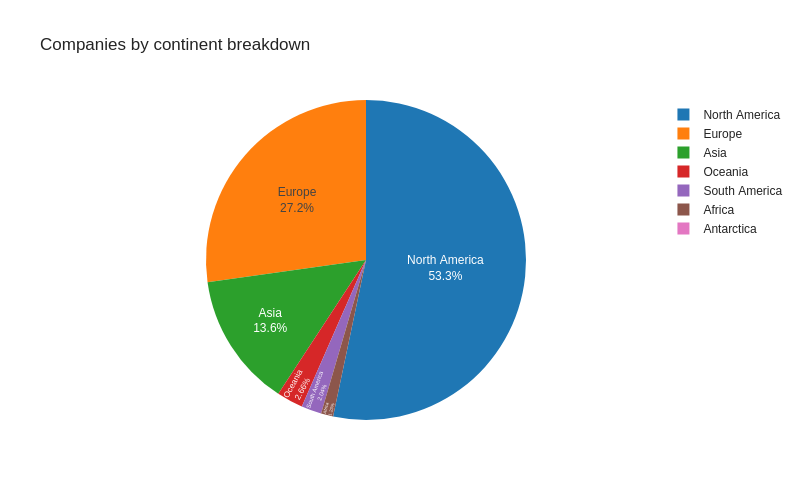

In [53]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = 'simple_white'

def show_fig():
    fig.show(renderer='png', width=800)

fig = px.pie(df_continent_count,
             values='num_of_companies',
             names='continent_name',
             title='Companies by continent breakdown')

fig.update_traces(textposition='inside', textinfo='percent+label')

show_fig()

Interesting, there appears to be 2 companies in Antarctica. Let's have a look:

In [54]:
df_continents.query('continent_name=="Antarctica"')

,name,type,primary_role,combined_stock_symbols,city,region,country_code,country_name,continent_name
1238022,Names Directory,organization,company,NaN,Bouvet Island,NA - Bouvet Island,BVT,NaN,Antarctica
2019999,QBO,organization,company,NaN,Bouvet Island,NA - Bouvet Island,BVT,NaN,Antarctica


In [55]:
#### 7.7 What are the top 10 countries with the most companies?

In [56]:
df_top_10_countries = df_continents['country_name'].value_counts().head(10).to_frame(name='num_of_companies').reset_index()

df_top_10_countries

,index,num_of_companies
0,United States,1130976
1,United Kingdom,173206
2,India,86203
3,Germany,80353
4,Canada,75397
5,France,58166
6,Australia,53043
7,Japan,50465
8,Netherlands,50395
9,Spain,42973


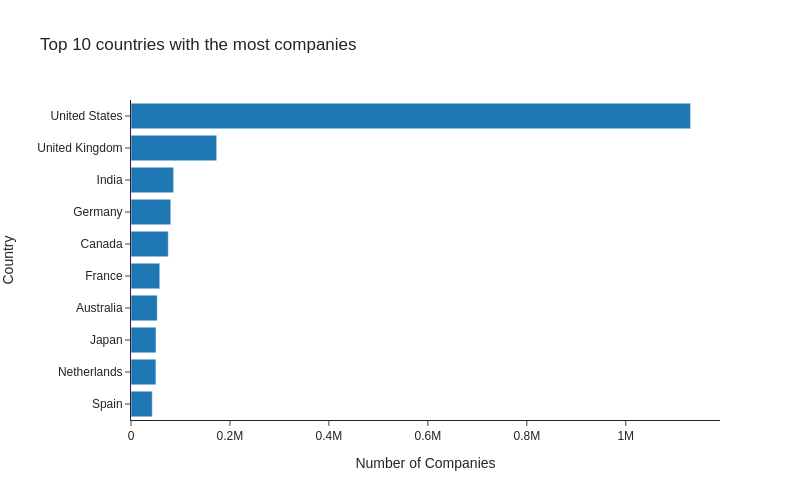

In [57]:
fig = px.bar(df_top_10_countries.sort_values('num_of_companies', ascending=True), x='num_of_companies', y='index',
             orientation='h',
             labels={'index': 'Country', 'num_of_companies': 'Number of Companies'},
             title='Top 10 countries with the most companies')

show_fig()

#### 7.8 What are the top 10 cities with the most companies?

In [58]:
df_top_10_cities = df_continents[['city', 'region']].value_counts().head(10).to_frame(name='num_of_companies').reset_index()

df_top_10_cities

,city,region,num_of_companies
0,London,England,53904
1,New York,New York,49347
2,San Francisco,California,26597
3,Los Angeles,California,20634
4,Tokyo,Tokyo,19412
5,Chicago,Illinois,17010
6,Paris,Ile-de-France,16175
7,Houston,Texas,16047
8,Toronto,Ontario,15147
9,Singapore,Central Region,12996


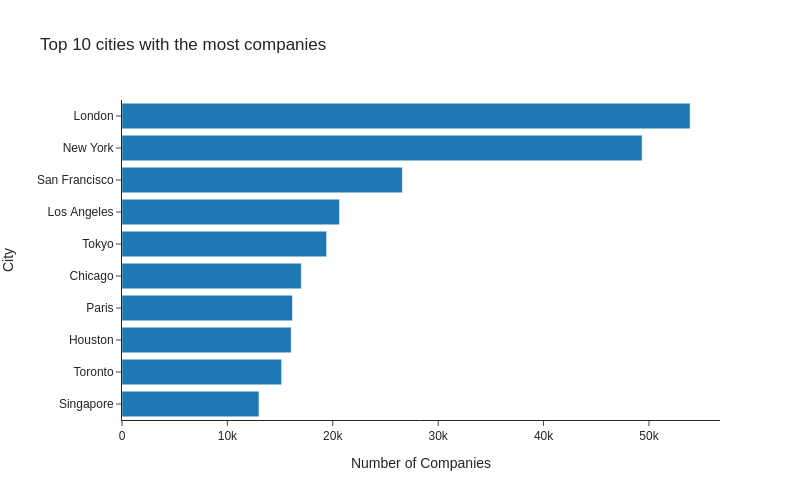

In [59]:
fig = px.bar(df_top_10_cities.sort_values('num_of_companies', ascending=True), x='num_of_companies', y='city',
             orientation='h',
             labels={'city': 'City', 'num_of_companies': 'Number of Companies'},
             title='Top 10 cities with the most companies')

show_fig()

#### 7.9 In the U.S., how many companies are private vs. public?

In [60]:
# add a new column 'status' to denote whether the company is 'private' or 'public' based on the 'combined_stock_symbols' value
df['status'] = df['combined_stock_symbols'].apply(lambda x: 'private' if pd.isnull(x) else 'public')

# USA only
df_usa = df.query('country_code=="USA"')

df_status_count = df_usa['status'].value_counts().head(10).to_frame(name='num_of_companies').reset_index()
df_status_count['%'] = round( df_status_count['num_of_companies'] / df_status_count['num_of_companies'].sum() * 100, 2 )

df_status_count

,index,num_of_companies,%
0,private,1121987,99.21
1,public,8989,0.79


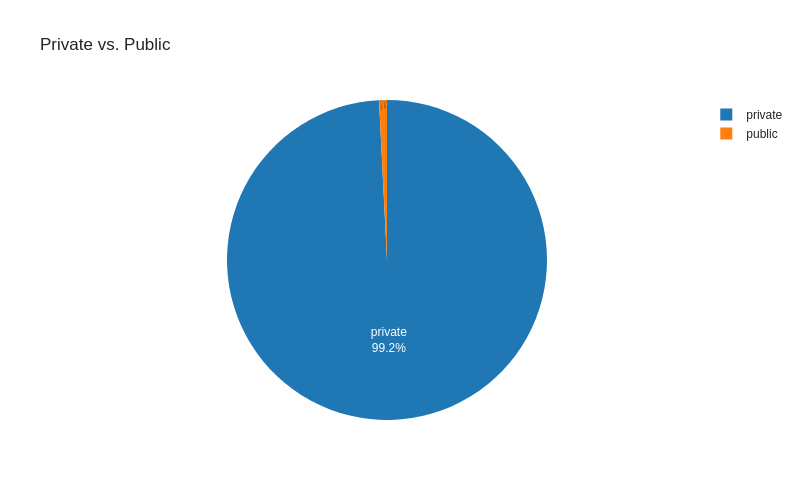

In [61]:
fig = px.pie(df_status_count,
             values='num_of_companies',
             names='index',
             title='Private vs. Public')

fig.update_traces(textposition='inside', textinfo='percent+label')

show_fig()

#### 7.10 In the U.S., what is the breakdown percentages by state?

Let's add the state abbreviations data courtesy of census.gov:

- https://www.census.gov/library/reference/code-lists/ansi.html#state
- https://www2.census.gov/geo/docs/reference/state.txt

In [62]:
df_usa.sample(5)

,name,type,primary_role,combined_stock_symbols,city,region,country_code,status
8185,Smule,organization,company,NaN,San Francisco,California,USA,private
2253315,Vera Pax,organization,company,NaN,Sheridan,Wyoming,USA,private
1677084,PSD Markup,organization,company,NaN,Fresno,California,USA,private
2414675,ViviPet,organization,company,NaN,Chino,California,USA,private
2448076,"Riggins Law, PC",organization,company,NaN,Pasadena,California,USA,private


In [63]:
df_usa_states = pd.read_csv('https://www2.census.gov/geo/docs/reference/state.txt', sep='|', header=0, names=[
    'state_code', 'state', 'state_name', 'gnisid'
])

# keep only state abbr and state name
df_usa_states = df_usa_states[['state', 'state_name']]

df_usa_states.head()

,state,state_name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


Let's merge this with the U.S. dataframe:

In [64]:
df_usa = df_usa.merge(df_usa_states, left_on=['region'], right_on=['state_name'], how='left')

In [65]:
df_usa.head()

,name,type,primary_role,combined_stock_symbols,city,region,country_code,status,state,state_name
0,Wetpaint,organization,company,NaN,New York,New York,USA,private,NY,New York
1,Zoho,organization,company,NaN,Pleasanton,California,USA,private,CA,California
2,Digg,organization,company,NaN,New York,New York,USA,private,NY,New York
3,Meta,organization,company,nasdaq:META,Menlo Park,California,USA,public,CA,California
4,Omnidrive,organization,company,NaN,Palo Alto,California,USA,private,CA,California


In [66]:
# drop 'region' column
df_usa = df_usa.drop(columns='region')

df_usa.head()

,name,type,primary_role,combined_stock_symbols,city,country_code,status,state,state_name
0,Wetpaint,organization,company,NaN,New York,USA,private,NY,New York
1,Zoho,organization,company,NaN,Pleasanton,USA,private,CA,California
2,Digg,organization,company,NaN,New York,USA,private,NY,New York
3,Meta,organization,company,nasdaq:META,Menlo Park,USA,public,CA,California
4,Omnidrive,organization,company,NaN,Palo Alto,USA,private,CA,California


In [67]:
df_usa_state_count = df_usa[['state', 'state_name']].value_counts().to_frame(name='num_of_companies').reset_index()

df_usa_state_count['%'] = round( df_usa_state_count['num_of_companies'] / df_usa_state_count['num_of_companies'].sum() * 100, 2 )

df_usa_state_count.head(10)

,state,state_name,num_of_companies,%
0,CA,California,207439,18.34
1,NY,New York,95323,8.43
2,TX,Texas,87026,7.69
3,FL,Florida,77057,6.81
4,IL,Illinois,47038,4.16
5,MA,Massachusetts,37950,3.36
6,PA,Pennsylvania,37115,3.28
7,GA,Georgia,32683,2.89
8,NJ,New Jersey,31982,2.83
9,OH,Ohio,31595,2.79


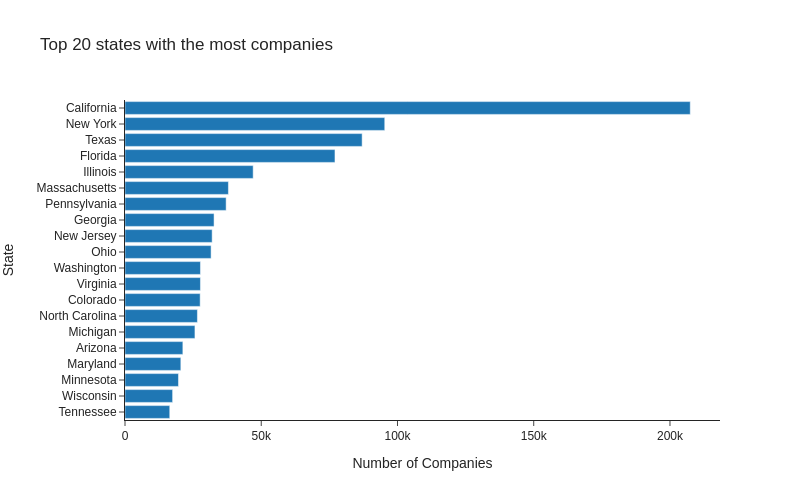

In [68]:
fig = px.bar(df_usa_state_count.head(20).sort_values('num_of_companies', ascending=True), x='num_of_companies', y='state_name',
             orientation='h',
             labels={'state_name': 'State', 'num_of_companies': 'Number of Companies'},
             title='Top 20 states with the most companies')

show_fig()

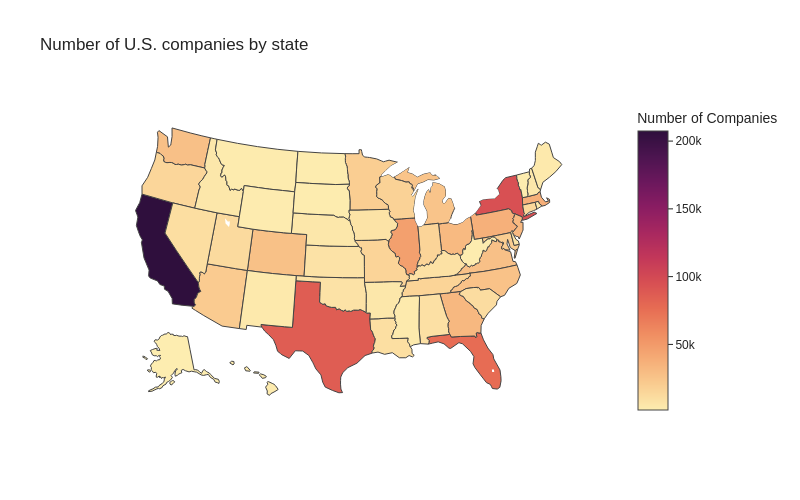

In [69]:
fig = px.choropleth(df_usa_state_count,
                    locations='state', 
                    locationmode='USA-states',
                    scope='usa',
                    color='num_of_companies',
                    color_continuous_scale='matter',
                    title='Number of U.S. companies by state',
                    labels={'state': 'State', 'num_of_companies': 'Number of Companies'},
                    hover_name='state_name'
                   )

show_fig()

#### 7.11 In the U.S., what is the breakdown percentages by city?

In [70]:
df_usa_city_count = df_usa[['city', 'state']].value_counts().to_frame(name='num_of_companies').reset_index()

df_usa_city_count['%'] = round( df_usa_city_count['num_of_companies'] / df_usa_city_count['num_of_companies'].sum() * 100, 2 )

df_usa_city_count.head(10)

,city,state,num_of_companies,%
0,New York,NY,49347,4.36
1,San Francisco,CA,26597,2.35
2,Los Angeles,CA,20634,1.82
3,Chicago,IL,17010,1.50
4,Houston,TX,16047,1.42
5,Austin,TX,12990,1.15
6,San Diego,CA,11663,1.03
7,Atlanta,GA,11625,1.03
8,Dallas,TX,10889,0.96
9,Miami,FL,10742,0.95


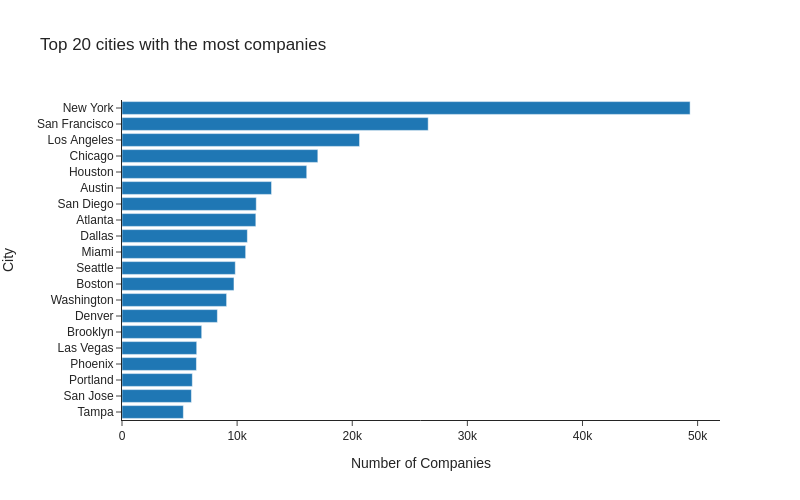

In [71]:
fig = px.bar(df_usa_city_count.head(20).sort_values('num_of_companies', ascending=True), x='num_of_companies', y='city',
             orientation='h',
             labels={'city': 'City', 'num_of_companies': 'Number of Companies'},
             title='Top 20 cities with the most companies')

show_fig()

Let's add the city lat/long coordinates to plot the cities as a bubble map:

[simplemaps](https://simplemaps.com/data/us-cities) provides a U.S. cities database with this data; the Basic version will do.

In [72]:
# download the zip file
url = 'https://simplemaps.com/static/data/us-cities/1.76/basic/simplemaps_uscities_basicv1.76.zip'

response = requests.get(url)

open('data/simplemaps_uscities.zip', 'wb').write(response.content)

4218789

In [73]:
# unzip the file
!unzip data/simplemaps_uscities.zip -d data

Archive:  data/simplemaps_uscities.zip
  inflating: data/license.txt        
  inflating: data/uscities.csv       
  inflating: data/uscities.xlsx      


In [74]:
# remove some files
!rm data/simplemaps_uscities.zip data/license.txt data/uscities.xlsx
!ls -R1 data

data:
crunchbase.tar.gz
organizations.csv
uscities.csv


In [75]:
# cities with lat/long coords
df_usa_cities_db = pd.read_csv('data/uscities.csv', usecols=['city', 'state_id', 'lat', 'lng'])

df_usa_cities_db.head()

,city,state_id,lat,lng
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1141,-118.4068
2,Chicago,IL,41.8375,-87.6866
3,Miami,FL,25.7840,-80.2101
4,Dallas,TX,32.7935,-96.7667


In [76]:
# rename column
df_usa_cities_db.rename(columns={'state_id': 'state'}, inplace=True)

df_usa_cities_db.head()

,city,state,lat,lng
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1141,-118.4068
2,Chicago,IL,41.8375,-87.6866
3,Miami,FL,25.7840,-80.2101
4,Dallas,TX,32.7935,-96.7667


Let's create a dataframe of the top 100 cities:

In [77]:
# top 100 cities with most companies
df_usa_cities_top_100 = df_usa[['city', 'state']].value_counts().to_frame(name='num_of_companies').reset_index().head(100)

df_usa_cities_top_100.head()

,city,state,num_of_companies
0,New York,NY,49347
1,San Francisco,CA,26597
2,Los Angeles,CA,20634
3,Chicago,IL,17010
4,Houston,TX,16047


Now let's merge `df_usa_cities_db` with it so we'll have the cities' lat/long coordinates:

In [78]:
df_usa_cities_top_100 = df_usa_cities_top_100.merge(df_usa_cities_db, on=['city', 'state'], how='left')

In [79]:
df_usa_cities_top_100.head()

,city,state,num_of_companies,lat,lng
0,New York,NY,49347,40.6943,-73.9249
1,San Francisco,CA,26597,37.7558,-122.4449
2,Los Angeles,CA,20634,34.1141,-118.4068
3,Chicago,IL,17010,41.8375,-87.6866
4,Houston,TX,16047,29.7860,-95.3885


In [80]:
# check if there are any NaN values
df_usa_cities_top_100.isna().sum()

city                0
state               0
num_of_companies    0
lat                 2
lng                 2
dtype: int64

In [81]:
# 2 cities did not join, let's see what those 2 cities are:
df_usa_cities_top_100[df_usa_cities_top_100['lat'].isna()]

,city,state,num_of_companies,lat,lng
30,St Louis,MO,3833,NaN,NaN
75,Saint Paul,MN,1810,NaN,NaN


The 2 cities are `St Louis, MO` and `Saint Paul, MN`.

From the `df_usa_cities_db` df, let's see why those 2 cities didn't join:

In [82]:
df_usa_cities_db[ (df_usa_cities_db.city.str.contains(' Louis')) & (df_usa_cities_db.state.str.contains('MO')) ]

,city,state,lat,lng
22,St. Louis,MO,38.6359,-90.2451
2662,Lake St. Louis,MO,38.7846,-90.7886


In [83]:
df_usa_cities_db[ (df_usa_cities_db.city.str.contains(' Paul')) & (df_usa_cities_db.state.str.contains('MN')) ]

,city,state,lat,lng
143,St. Paul,MN,44.9478,-93.1039
2179,South St. Paul,MN,44.8877,-93.0411
2194,West St. Paul,MN,44.9018,-93.0858
3414,North St. Paul,MN,45.0137,-92.9995
6162,St. Paul Park,MN,44.8359,-92.9949


They didn't join due to mis-abbreviations. Let's add the lat/long coordinates manually:

In [84]:
# find by row index location
df_usa_cities_top_100.loc[[30], ['city', 'state', 'lat','lng']]

,city,state,lat,lng
30,St Louis,MO,NaN,NaN


In [85]:
# find by row index location
df_usa_cities_top_100.loc[[75], ['city', 'state', 'lat','lng']]

,city,state,lat,lng
75,Saint Paul,MN,NaN,NaN


In [86]:
# update the lat/long coords manually
st_louis_mo = df_usa_cities_db.loc[[22], ['lat','lng']].values.tolist()
st_paul_mn = df_usa_cities_db.loc[[143], ['lat','lng']].values.tolist()

df_usa_cities_top_100.loc[[30], ['lat','lng']] = st_louis_mo
df_usa_cities_top_100.loc[[75], ['lat','lng']] = st_paul_mn

In [87]:
# check
df_usa_cities_top_100.loc[[30], ['city', 'state', 'lat','lng']]

,city,state,lat,lng
30,St Louis,MO,38.6359,-90.2451


In [88]:
# check
df_usa_cities_top_100.loc[[75], ['city', 'state', 'lat','lng']]

,city,state,lat,lng
75,Saint Paul,MN,44.9478,-93.1039


In [89]:
# confirm there aren't anymore NaN values
df_usa_cities_top_100.isnull().sum()

city                0
state               0
num_of_companies    0
lat                 0
lng                 0
dtype: int64

In [90]:
df_usa_cities_top_100.sample(5)

,city,state,num_of_companies,lat,lng
0,New York,NY,49347,40.6943,-73.9249
20,Minneapolis,MN,5308,44.9635,-93.2678
74,Beverly Hills,CA,1845,34.0786,-118.4021
69,Albuquerque,NM,1940,35.1054,-106.6465
99,Bethesda,MD,1397,38.9866,-77.1188


Let's create a new column consisting of `City, State` for use in the map hover:

In [91]:
df_usa_cities_top_100['city_state'] = df_usa_cities_top_100['city'] + ', ' + df_usa_cities_top_100['state']

df_usa_cities_top_100.sample(5)

,city,state,num_of_companies,lat,lng,city_state
68,Grand Rapids,MI,1971,42.9619,-85.6562,"Grand Rapids, MI"
95,Anaheim,CA,1498,33.8390,-117.8574,"Anaheim, CA"
81,Knoxville,TN,1669,35.9692,-83.9496,"Knoxville, TN"
43,Oakland,CA,2851,37.7904,-122.2166,"Oakland, CA"
63,Bellevue,WA,2086,47.5951,-122.1535,"Bellevue, WA"


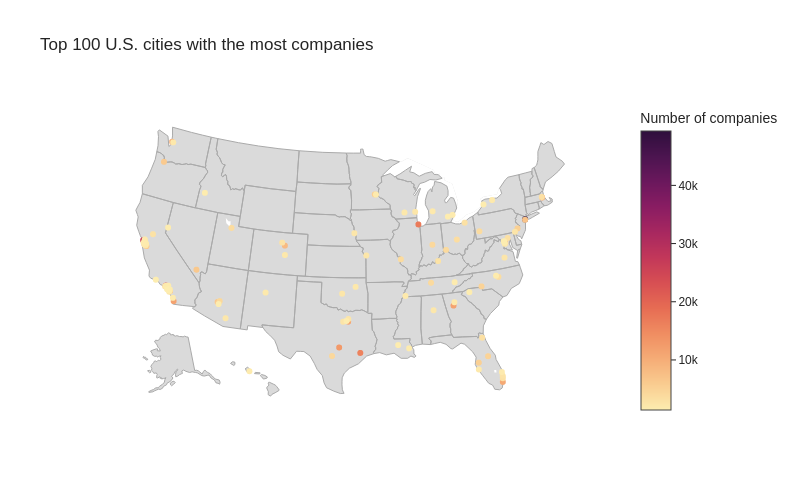

In [92]:
fig = px.scatter_geo(df_usa_cities_top_100,
                    lat='lat', lon='lng',
                    locationmode='USA-states',
                    scope='usa',
                    color='num_of_companies',
                    color_continuous_scale='matter',
                    title='Top 100 U.S. cities with the most companies',
                    labels={'city': 'City', 'state': 'State', 'num_of_companies': 'Number of companies'},
                    hover_data={'lat': False, 'lng': False, 'num_of_companies': ':,.0f'},
                    hover_name='city_state'
                   )

fig.update_geos(landcolor='#dadada', subunitcolor='#aaa')

show_fig()

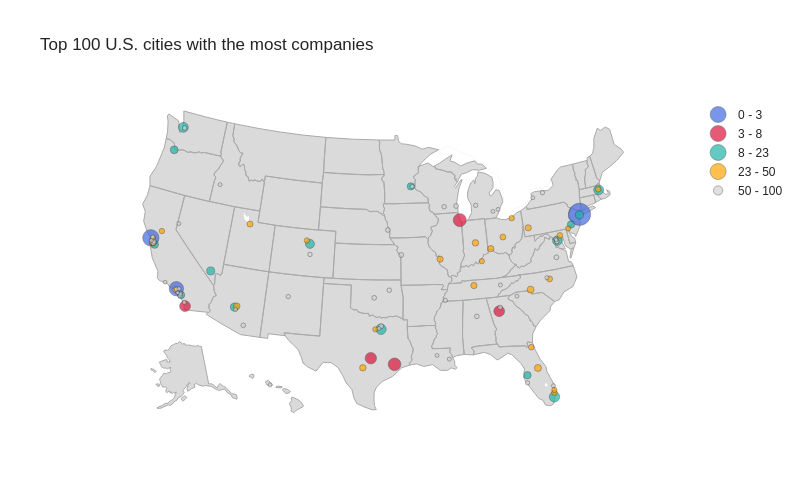

In [93]:
import plotly.graph_objects as go

# add and format hover over text
df_usa_cities_top_100['text'] = df_usa_cities_top_100['city_state'] + '<br>Number of companies: ' + (df_usa_cities_top_100.num_of_companies.apply(lambda x: '{:,.0f}'.format(x)))

# scale bubbles by top 3, next 5, next 15, next 27, last 50
limits = [(0,3),(3,8),(8,23),(23,50),(50,100)]
colors = ['royalblue', 'crimson', 'lightseagreen', 'orange', 'lightgrey']
scale = 200

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_usa_cities_top_100[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lat = df_sub['lat'],
        lon = df_sub['lng'],
        text = df_sub['text'],
        hoverinfo='text',
        marker = dict(
            size = df_sub['num_of_companies']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Top 100 U.S. cities with the most companies',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.update_geos(landcolor='#dadada', subunitcolor='#aaa')

show_fig()

The above bubble map represents the top cities in the tiers:

- Top 3
- \#4 - \#8
- \#9 - \#23
- \#24- \#50
- Last 50